**Identification of crime hotspots in Vancouver city using DBSCAN Algorithm (basic)**

Dataset Used:[*Vancouver Open Data Catalogue*](https://www.kaggle.com/wosaku/crime-in-vancouver?select=crime.csv)

[Data of crimes in Vancouver (Canada) from 2003 to 2017]

Source: Kaggle

**Sci-kit libraries have only been used for Data Visualisation. No in-built libraries have been used for the implementation of DBSCAN Algorithm, the code is purely for understanding the algorithmic logic.**

In [ ]:
#Mounting the my drive to access the crime.csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import requisite libraries for data visualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#read the dataset
#the path given is relative to my monted drive- please CHANGE it as per your path
dataset=pd.read_csv("/content/drive/My Drive/Datasets/crime.csv")
 
#only considering the coordinates of each place for this example
dataset=dataset[['X','Y']]
 
dataset.head() #prints first 5 rows

,X,Y
0,493906.5,5457452.47
1,493906.5,5457452.47
2,493906.5,5457452.47
3,493906.5,5457452.47
4,493906.5,5457452.47


In [ ]:
#initial shape of dataset
dataset.shape

(530652, 2)

In [ ]:
df=dataset[:1799] #first 1800 tuples taken

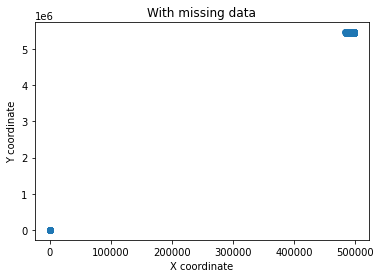

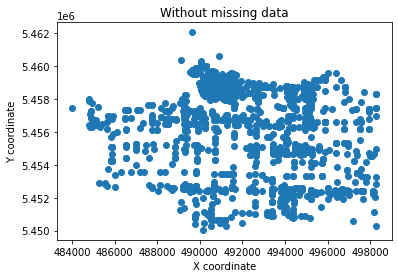

In [ ]:
#df plotted
plt.scatter(df['X'],df['Y'])
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('With missing data')
plt.show()

#Removing the missing values (0 values in df)
df=df[df.X!=0].dropna().reset_index(drop=True)
plt.scatter(df['X'],df['Y'])
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Without missing data')
plt.show()

In [ ]:
df.shape # final size

(1653, 2)

In [ ]:
#variables assigning
x=df['X']
y=df['Y']

#chosen eps and minPts value
eps=400
minPts=4

core_points=[]
subcluster=[]
cluster=[]
temp=[]
i=0

#Initially all indices stored as noise, as points classified as core points
#or border points they are removed from this list
noise=[i for i in range(0,len(x)-1)] 

In [ ]:
for i in range(0,len(x)):
  c=0  
  flag=0

  for j in range(len(x)):
    #Finding out the neighbours 'j' for each point 'i' in the dataframe
    
    #When the element is taken with itself
    if i==j:   
      continue 
   
    else:
      #euclidean dist between ith point and jth pt
      dist=((x.iloc[i]-x.iloc[j])**2 + (y.iloc[i]-y.iloc[j])**2 )**0.5

      #Checking if point j is a neighbour for point i
      if dist<=eps:   
        #Store the index of neighbours of neighbours of i
        temp.append(j) 
  
  if len(temp)>=minPts: #Checking if point i is a core point
    core_points.append(i)   #store indices of core points
    subcluster=temp      #subcluster stores indices of all neighbours of i
  
    for v in subcluster:
      if v in noise: #If point in subcluster, it is not an outlier
        noise.remove(v)
    if i in noise: #If core point is in outlier set, remove it
      noise.remove(i)
    for k in range(len(cluster)):  
      if i in cluster[k]: #Checking if core point is also border point 
          flag=1 
          cluster[k]=set(cluster[k]).union(set(subcluster)) #All points in same cluster, density connected
          break
    if flag==0:
     #If core point is not a border point i.e; not in any cluster- make separate
     #cluster
      subcluster.append(i)
      cluster.append(set(subcluster)) 
  temp=[]
  subcluster=[]

     

In [ ]:
print('Noise points:')
print(noise)
print('No of clusters:',len(cluster))
print('Clusters:')
for i in cluster:
  print(i)

Noise points:
[7, 11, 22, 23, 24, 25, 32, 79, 148, 149, 241, 263, 358, 475, 485, 493, 509, 537, 538, 559, 560, 572, 578, 580, 592, 594, 606, 616, 617, 619, 620, 621, 622, 624, 628, 631, 637, 638, 640, 642, 643, 646, 670, 676, 706, 708, 716, 721, 722, 744, 746, 747, 752, 753, 754, 757, 767, 778, 786, 796, 797, 805, 819, 821, 831, 869, 870, 878, 885, 889, 893, 900, 903, 908, 924, 934, 943, 945, 946, 949, 952, 957, 962, 968, 972, 998, 1004, 1034, 1036, 1038, 1039, 1040, 1042, 1051, 1064, 1065, 1068, 1074, 1077, 1097, 1189, 1194, 1195, 1196, 1198, 1213, 1226, 1236, 1237, 1238, 1239, 1240, 1241, 1245, 1246, 1247, 1248, 1249, 1262, 1280, 1283, 1287, 1291, 1292, 1298, 1301, 1342, 1358, 1365, 1367, 1369, 1397, 1413, 1425, 1440, 1444, 1471, 1472, 1496, 1497, 1498, 1502, 1503, 1513, 1520, 1525, 1559, 1581, 1600, 1601, 1623, 1624, 1625, 1628, 1646, 1648]
No of clusters: 87
Clusters:
{0, 1, 2, 3, 4, 5, 1408, 645, 8, 392, 10, 130, 131, 1293, 1541, 17, 18, 1426, 1427, 1428, 405, 406, 132, 1562, 1563

In [ ]:
#list of all color hex values
colors=['#E52B50','#FFBF00','#9966CC','#FBCEB1','#7FFFD4','#007FFF','#89CFF0',
        '#0000FF','#964B00','#FFD700','#808080','#008000','#3FFF00','#4B0082',
        '#FFuFFF0','#00A86B','#29AB87','#B57EDC','#FFF700','#C8A2C8','#FF0000',
        '#C71585''#FF007F','#E0115F','#FA8072','#92000A','#0F52BA','#FF2400',
        '#C0C0C0','#708090','#A7FC00','#00FF7F','#D2B48C','#800080','#483C32',
        '#008080','#40E0D0','#3F00FF','#7F00FF','#40826D','#ff796c','#e6daa6',
        '#0504aa','#001146','#cea2fd','#ffb07c','#6f7632','#0a888a','#632de9',
        '#34013f','#856798','#154406','#a2a415','#ffa756','#0b8b87','#af884a',
        '#06b48b','#10a674','#a2bffe','#769958','#5cac2d','#cb0162','#980002',
        '#88b378','#02d8e9','#ca6641','#caa0ff','#a9561e','#373e02','#c9ff27',
        '#be0119','#82a67d','#3d1c02','#5d06e9','#6a79f7','#ffb7ce','#343837',
        '#0a481e','#e17701','#696112','#8b2e16','#6a6e09','#ff9408','#fe7b7c',
        '#12e193','#b00149','#887191','#f7879a','#fe019a','#030aa7','#be6400',
        '#9a0200','#fd411e','#cdc50a','#c875c4','#fe2c54','#910951','#fcb001',
        '#d9544d','#01a049','#ac9362','#7a9703','#1fa774']

print('No of colors taken:',len(colors))

No of colors taken: 102


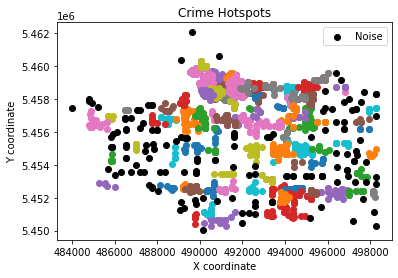

In [ ]:
tempx=[]
tempy=[]
for i in cluster:
  #print(i)
  for j in i:
    #print(x.iloc[j])
    tempx.append(x.iloc[j])
    tempy.append(y.iloc[j])
  plt.scatter(tempx,tempy,cmap=colors)
  tempx=[]
  tempy=[]
noise_x=[]
noise_y=[]
for o in noise:
  noise_x.append(x.iloc[o])
  noise_y.append(y.iloc[o])
plt.scatter(noise_x,noise_y,c='#000000',label='Noise') 
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Crime Hotspots')
plt.legend()
plt.show()

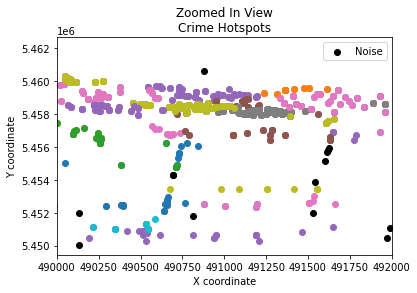

In [ ]:
tempx=[]
tempy=[]
for i in cluster:
  #print(i)
  for j in i:
    #print(x.iloc[j])
    tempx.append(x.iloc[j])
    tempy.append(y.iloc[j])
  plt.scatter(tempx,tempy,cmap=colors)
  tempx=[]
  tempy=[]
noise_x=[]
noise_y=[]
for o in noise:
  noise_x.append(x.iloc[o])
  noise_y.append(y.iloc[o])
plt.scatter(noise_x,noise_y,c='#000000',label='Noise') 
plt.xlim(490000,492000)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Zoomed In View\nCrime Hotspots')
plt.legend()
plt.show()